In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [88]:
# create three waves

N = 64
L = 1

#wave parameters
n1, m1 = -8,3
n2, m2 = 7,4

k1 = 2*np.pi*n1/L
l1 = 2*np.pi*m1/L
k2 = 2*np.pi*n2/L
l2 = 2*np.pi*m2/L

A1 = 1.4
A2 = 2.2

theta1 = 3.5
theta2 = 1.2

# third wave
n3 = n1+n2
m3 = m1+m2

k3 = 2*np.pi*n3/L
l3 = 2*np.pi*m3/L

A3 = 0.7
theta3 = 0.12

#grid
dx = L/N

x = np.linspace(dx/2, L - dx/2, N)
y = np.linspace(dx/2, L - dx/2, N)

X, Y = np.meshgrid(x,y)

# create waves

waves = A1*np.sin(k1*X + l1*Y + theta1) + A2*np.sin(k2*X + l2*Y + theta2) + A3*np.sin(k3*X + l3*Y + theta3)


Text(0.5, 1.0, 'Initial Wave field')

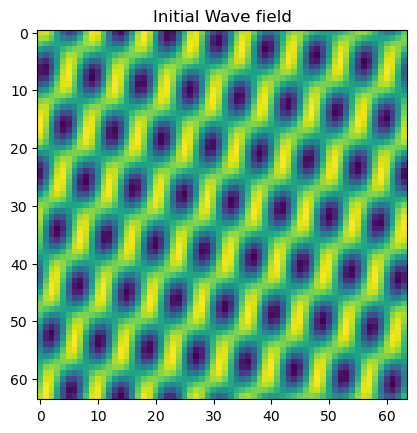

In [89]:
plt.imshow(waves)
plt.title("Initial Wave field")

1.4 2.2


Text(0.5, 1.0, 'Fourier Transform of initial wave field')

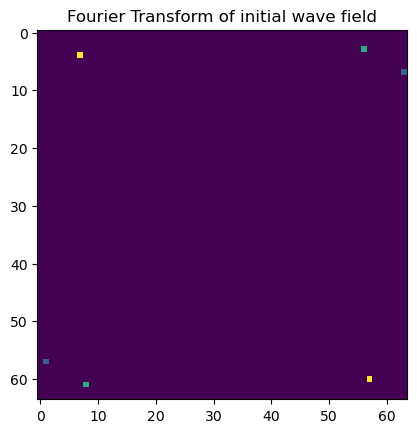

In [90]:
# check fourier transform of these waves

FFT1 = np.fft.fft2(waves)*dx**2

# check amplitudes and phases
amp1 = abs(FFT1[m1,n1])*2
amp2 = abs(FFT1[m2,n2])*2

print(amp1, amp2)

plt.imshow(abs(FFT1))
plt.title("Fourier Transform of initial wave field")

Text(0.5, 1.0, 'non linear term in physical space')

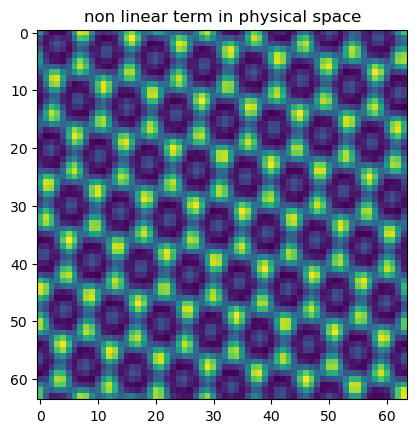

In [91]:
# calculate Jacobian and its fourier transform

from diagnostics_pkg import operators as o

psi_wave = waves
q_wave = o.calc_omega(waves, dx, bc_fac = -1)
NL = o.J(psi_wave, q_wave, dx, bc_fac = -1)

plt.imshow(NL)
plt.title("non linear term in physical space")

743816.817139352 640156.6249669357


Text(0.5, 1.0, 'Fourier Transform of non-linear term')

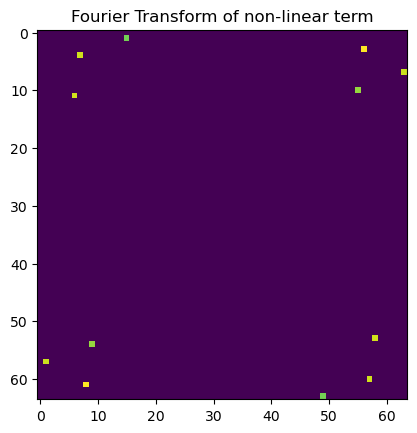

In [92]:
# calculate non-linear term in spectral space


FFT2 = np.fft.fft2(NL)*dx**2

# check triad amplitudes
amp1 = abs(FFT2[m1 + m2,n1 + n2])*2
amp2 = abs(FFT2[m2 - m1,n2 - n1])*2

print(amp1, amp2)

plt.imshow(abs(FFT2))
plt.title("Fourier Transform of non-linear term")

# indeed the Jacobian produces non-linear terms at the sum (and difference) of k1 and k2.

2.1011153556904175e-11

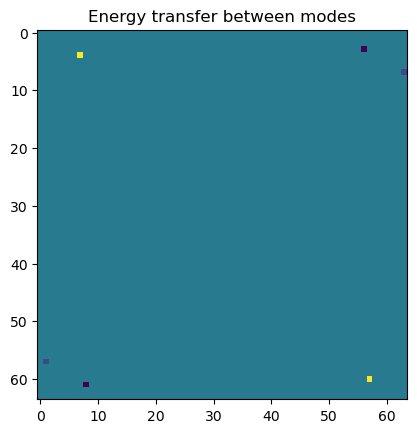

In [95]:
# calculate the energy transfer term

plt.imshow(np.real(np.conj(FFT1)*FFT2))
plt.title("Energy transfer between modes")

# show the sum to be zero
np.sum(np.real(np.conj(FFT1)*FFT2))